In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

In [9]:
def Drop_same_data(dataframe):
    x0_same = dataframe[dataframe.duplicated(subset=['x0'], keep=False)] ## 동시간대 데이터
    x0_same_group = x0_same.groupby('x0').aggregate('mean') ## 동시간 대 데이터 평군갑으로 변경
    x0_same_group = x0_same_group.reset_index() # index 초기화
    x0_same_drop = dataframe.drop_duplicates(['x0'], keep=False) ## 중복 제거
    x0_same_drop_mean = x0_same_drop.append(x0_same_group) ## 평균으로 바꾼 거 추가
    x0_same_drop_mean = x0_same_drop_mean.sort_values('x0').reset_index(drop=True) ## 시간 순 정렬
    return x0_same_drop_mean

In [5]:
def change_state(dataframe):
    df = dataframe.copy()
    df.replace('normal', 0, inplace=True)
    df.replace('abnormal', 1, inplace=True)
    return df

In [7]:
motor1 = pd.read_csv("C:/Users/creade/data_science/현대중공업_DT/DT/renewal_code/data/motor1.csv")

In [10]:
motor1 = change_state(motor1)
motor1 = Drop_same_data(motor1)
motor1 = motor1.round(2)

motor1.head()

C:\Users\creade\AppData\Local\Temp\ipykernel_10864\3482040146.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x0_same_drop_mean = x0_same_drop.append(x0_same_group) ## 평균으로 바꾼 거 추가


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26
0,2019-05-01 02:05:54,-0.58,0.55,-1.84,-1.61,0.73,-2.14,-3.18,0.01,1.16,...,-0.53,-0.70,-0.01,1.19,-0.65,3.0,-9.62,0.14,-1.58,1.0
1,2019-05-01 02:05:55,-0.58,0.54,-1.83,-1.61,0.73,-2.12,-3.17,0.01,1.17,...,-0.52,-0.70,-0.01,1.18,-0.65,3.0,-9.60,0.14,-1.58,1.0
2,2019-05-01 02:05:56,-0.58,0.54,-1.82,-1.61,0.73,-2.11,-3.16,0.01,1.18,...,-0.52,-0.69,-0.01,1.18,-0.65,3.0,-9.59,0.14,-1.58,1.0
3,2019-05-01 02:05:57,-0.58,0.54,-1.81,-1.61,0.73,-2.10,-3.15,0.01,1.18,...,-0.52,-0.69,-0.01,1.16,-0.65,3.0,-9.57,0.14,-1.58,1.0
4,2019-05-01 02:05:58,-0.58,0.54,-1.80,-1.61,0.74,-2.08,-3.14,0.01,1.19,...,-0.52,-0.69,-0.01,1.14,-0.65,3.0,-9.56,0.14,-1.58,1.0


In [11]:
motor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4243631 entries, 0 to 4243630
Data columns (total 27 columns):
 #   Column  Dtype  
---  ------  -----  
 0   x0      object 
 1   x1      float64
 2   x2      float64
 3   x3      float64
 4   x4      float64
 5   x5      float64
 6   x6      float64
 7   x7      float64
 8   x8      float64
 9   x9      float64
 10  x10     float64
 11  x11     float64
 12  x12     float64
 13  x13     float64
 14  x14     float64
 15  x15     float64
 16  x16     float64
 17  x17     float64
 18  x18     float64
 19  x19     float64
 20  x20     float64
 21  x21     float64
 22  x22     float64
 23  x23     float64
 24  x24     float64
 25  x25     float64
 26  x26     float64
dtypes: float64(26), object(1)
memory usage: 874.2+ MB


In [12]:
motor1.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26
count,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06,...,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06,4.243631e+06
mean,-1.270846e-05,1.616634e-04,-9.602814e-04,-3.346191e-06,5.931006e-05,-1.282604e-04,6.281885e-05,-1.337237e-03,2.827791e-04,-4.481516e-04,...,5.731036e-04,-1.038615e-04,-1.151325e-04,-2.183272e-05,-1.853389e-04,2.981511e+00,-1.227298e-04,2.650193e-03,3.977584e-04,6.607566e-01
std,1.000041e+00,1.000172e+00,1.001012e+00,1.000126e+00,1.000058e+00,1.000111e+00,1.000119e+00,1.000118e+00,1.000006e+00,9.998579e-01,...,1.000421e+00,1.000160e+00,1.000014e+00,1.000093e+00,1.000061e+00,1.347127e-01,1.000107e+00,1.000582e+00,1.000444e+00,4.734526e-01
min,-5.110000e+00,-7.480000e+00,-2.810000e+00,-2.710000e+00,-4.240000e+00,-2.311000e+01,-4.010000e+00,-1.456800e+02,-2.810000e+00,-4.350000e+00,...,-5.890000e+00,-4.840000e+00,-6.680000e+00,-9.260000e+00,-6.510000e+00,2.000000e+00,-9.620000e+00,-7.320000e+00,-1.860000e+00,0.000000e+00
25%,-5.200000e-01,-6.300000e-01,-7.400000e-01,-5.600000e-01,-4.300000e-01,1.600000e-01,-5.700000e-01,1.000000e-02,-8.300000e-01,-6.100000e-01,...,-4.700000e-01,-6.700000e-01,-1.200000e-01,-5.800000e-01,-3.700000e-01,3.000000e+00,-5.200000e-01,1.400000e-01,-4.800000e-01,0.000000e+00
50%,4.400000e-01,-5.400000e-01,-7.100000e-01,-1.000000e-02,8.000000e-02,2.500000e-01,-1.400000e-01,1.000000e-02,-2.300000e-01,-3.100000e-01,...,5.200000e-01,2.500000e-01,2.900000e-01,2.000000e-02,3.300000e-01,3.000000e+00,1.600000e-01,1.400000e-01,-2.000000e-01,1.000000e+00
75%,5.900000e-01,1.250000e+00,1.340000e+00,5.900000e-01,6.200000e-01,3.200000e-01,5.500000e-01,1.000000e-02,9.400000e-01,1.030000e+00,...,6.100000e-01,7.100000e-01,4.100000e-01,5.800000e-01,5.700000e-01,3.000000e+00,7.400000e-01,1.400000e-01,3.500000e-01,1.000000e+00
max,3.190000e+00,5.700000e+00,3.100000e+00,2.800000e+00,3.660000e+00,1.350000e+00,6.290000e+00,1.000000e-02,5.040000e+00,5.530000e+00,...,1.520000e+00,1.170000e+00,6.600000e-01,1.057000e+01,2.530000e+00,3.000000e+00,2.400000e+00,1.500000e-01,1.412000e+01,1.000000e+00


## Correlation Coefficient Heatmap

<AxesSubplot: >

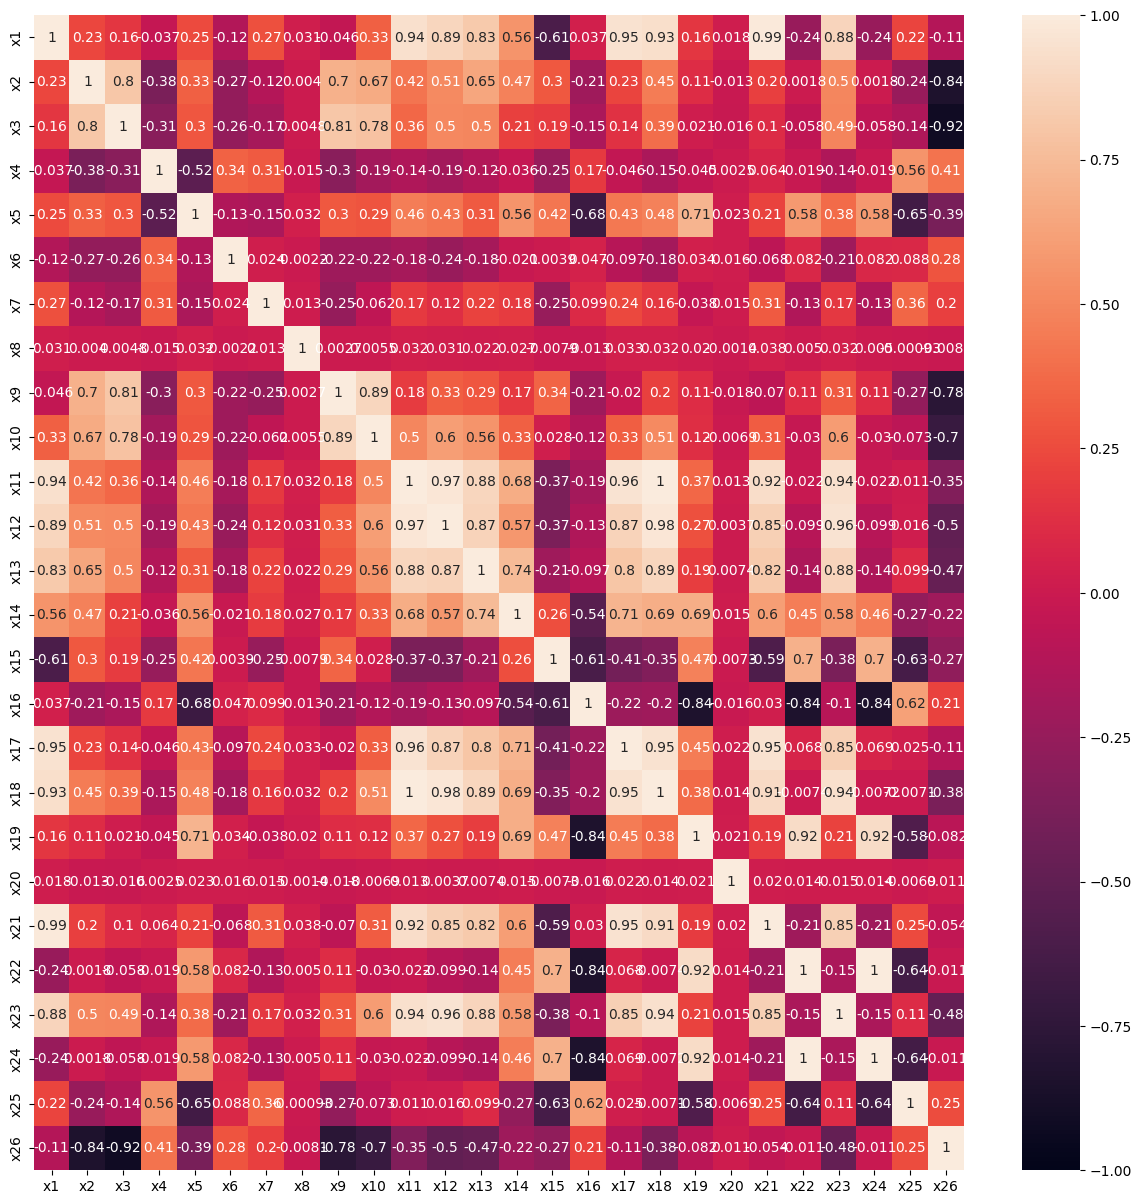

In [15]:
corr = motor1.corr()
fig = plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, vmax = 1, vmin = -1)

## Plot

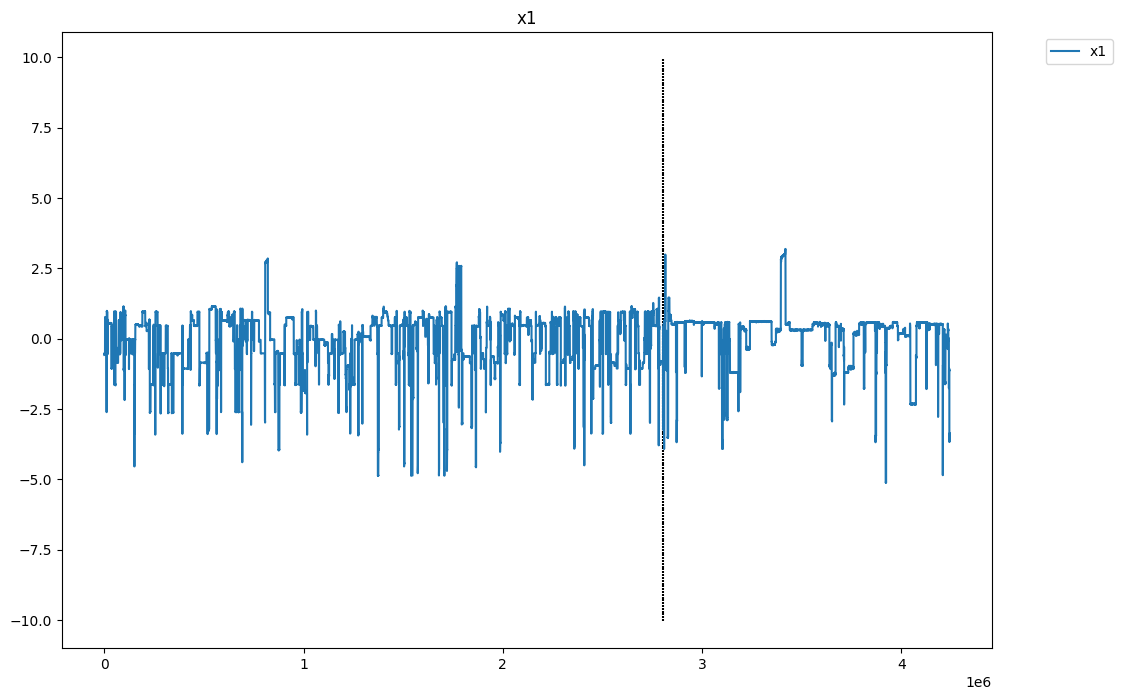

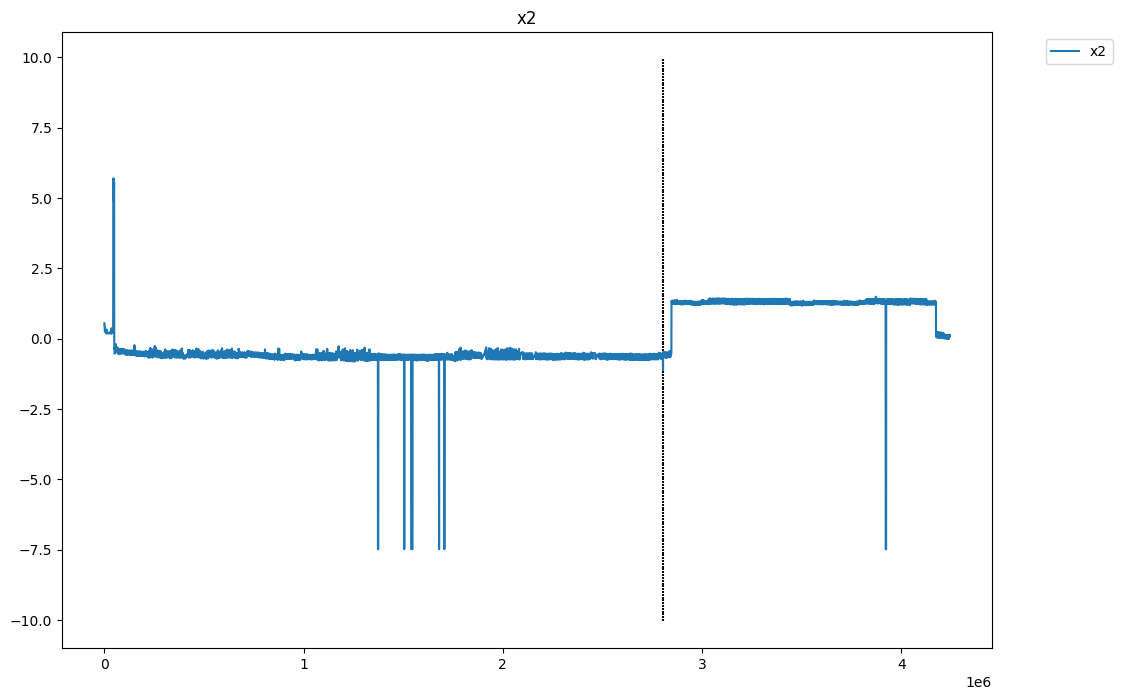

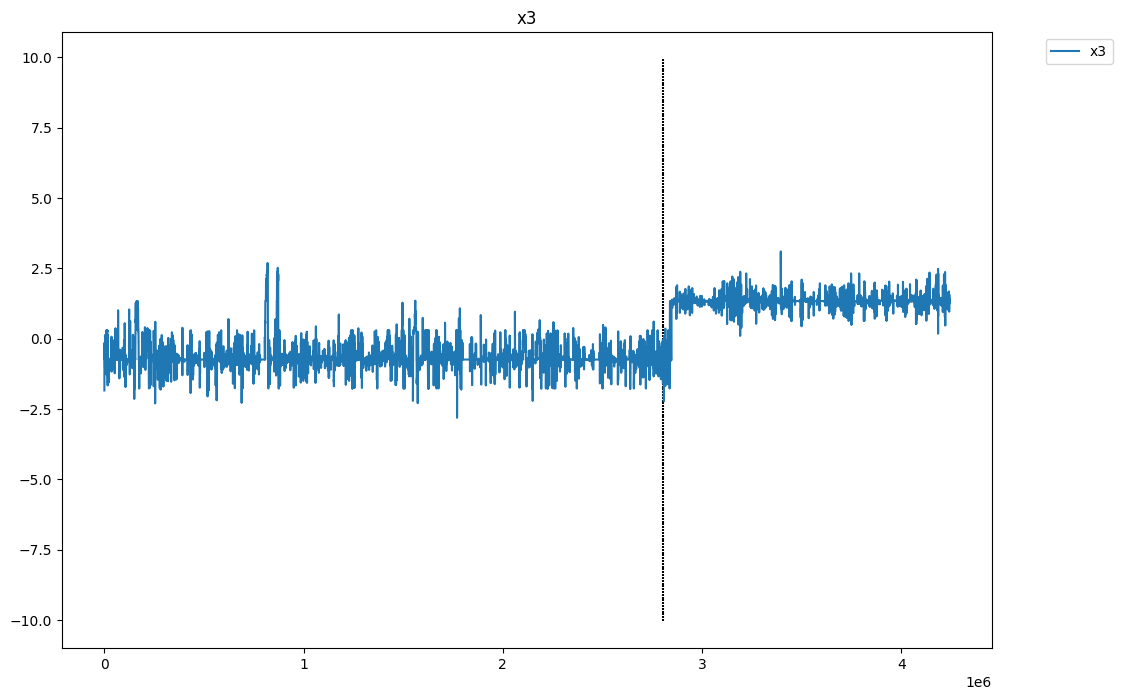

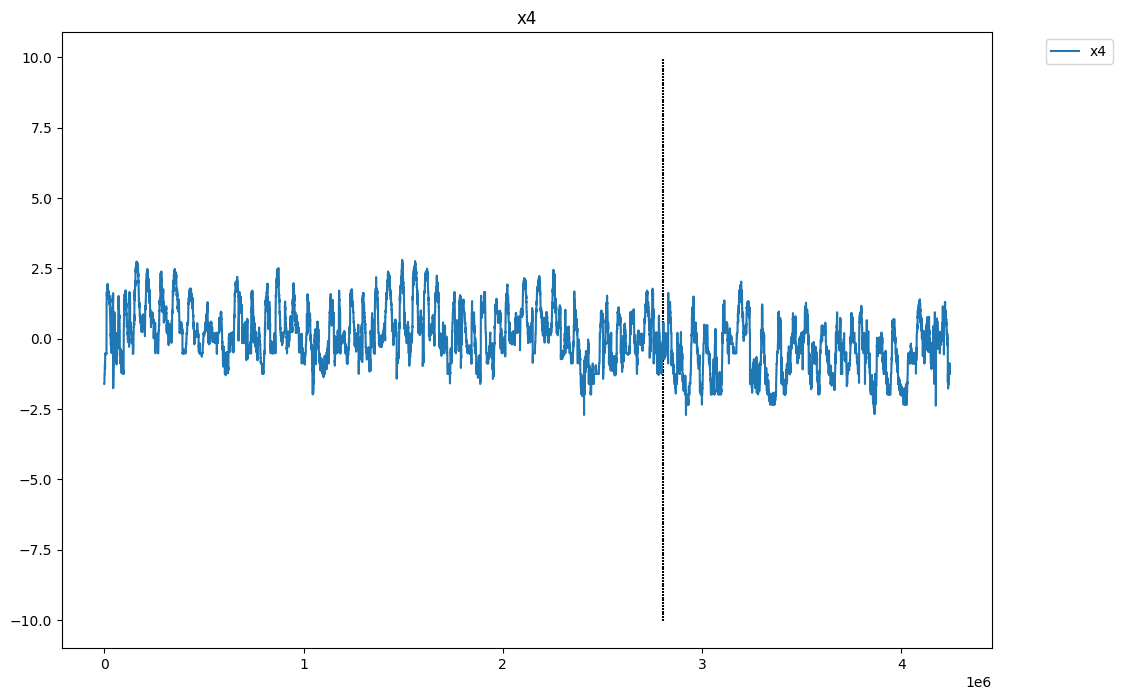

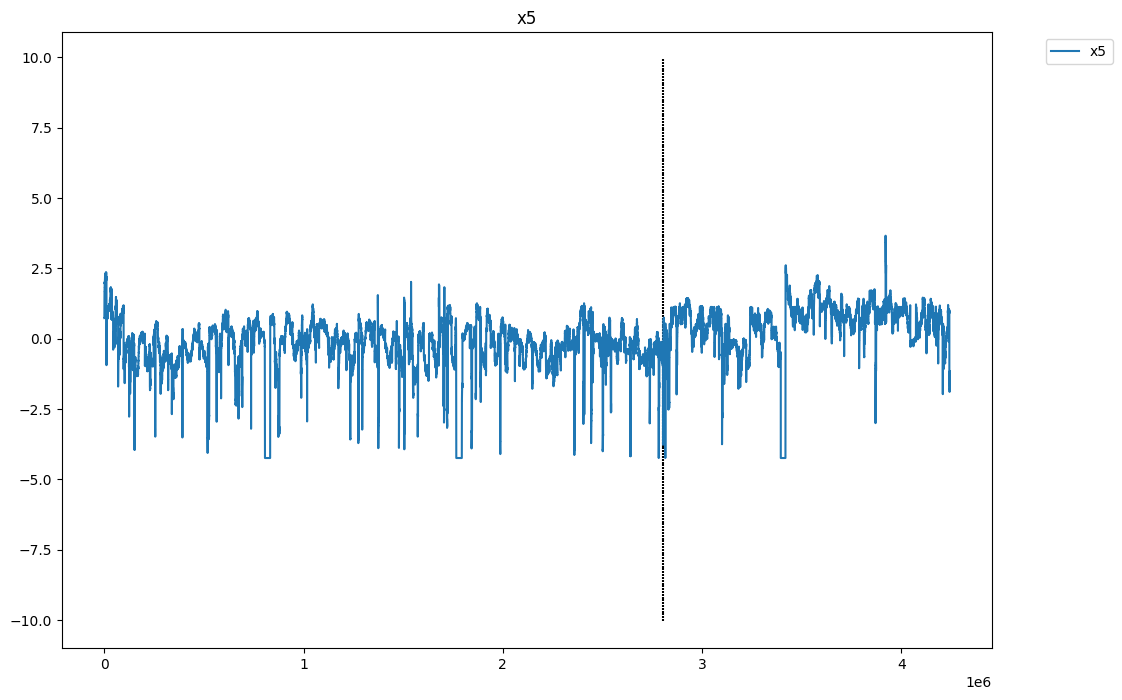

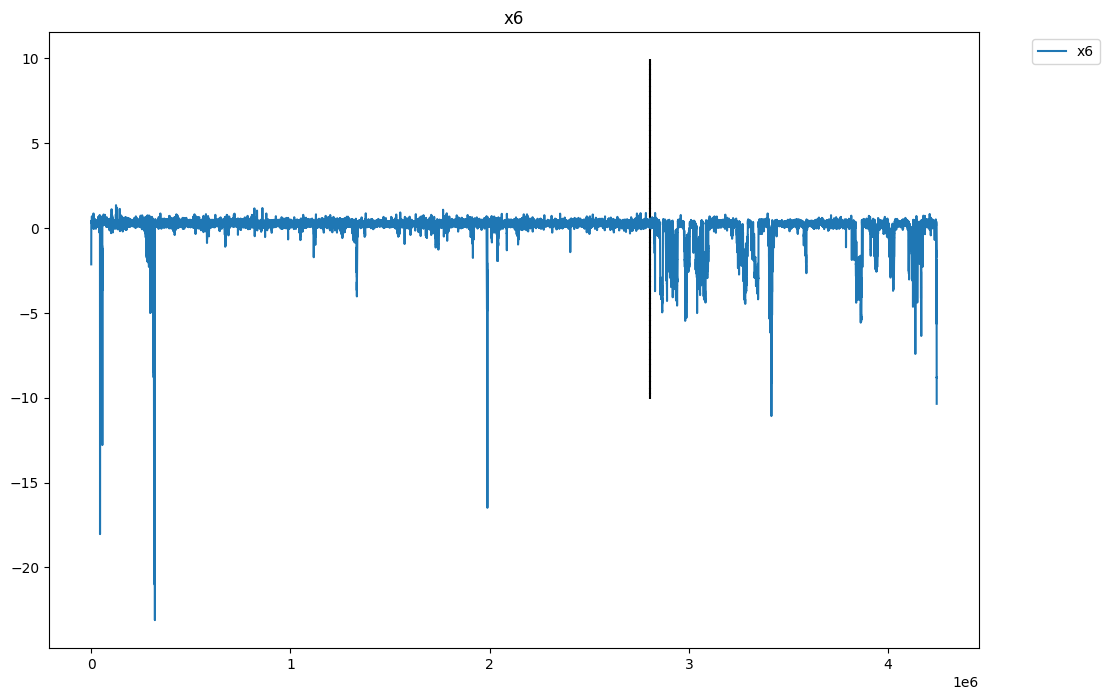

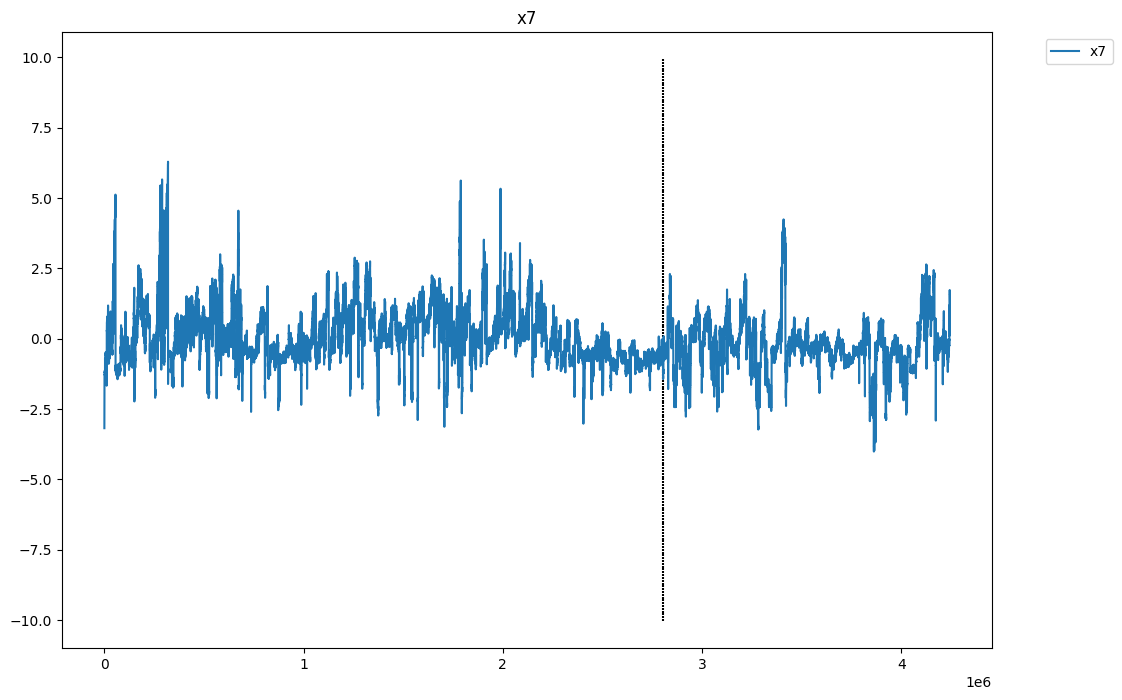

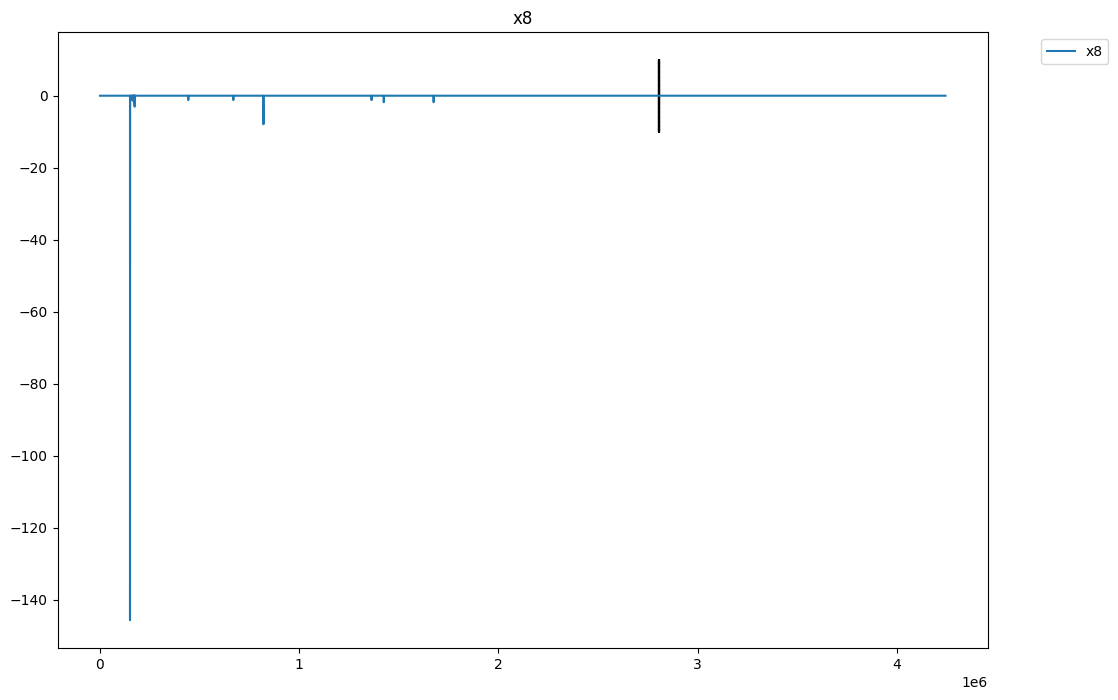

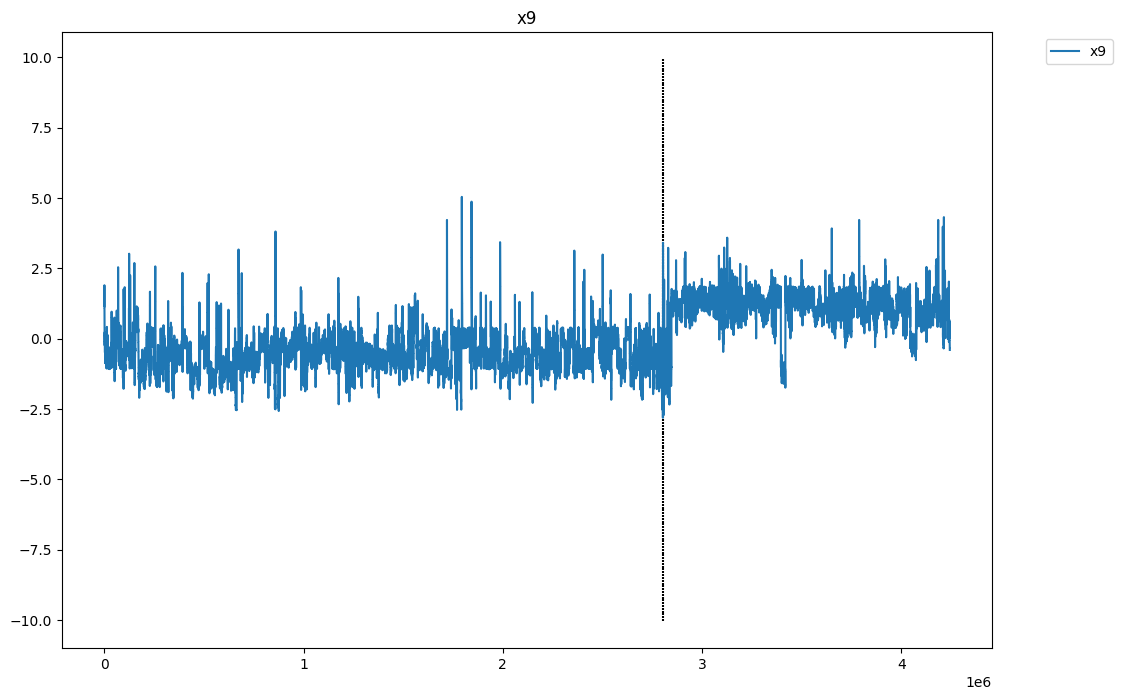

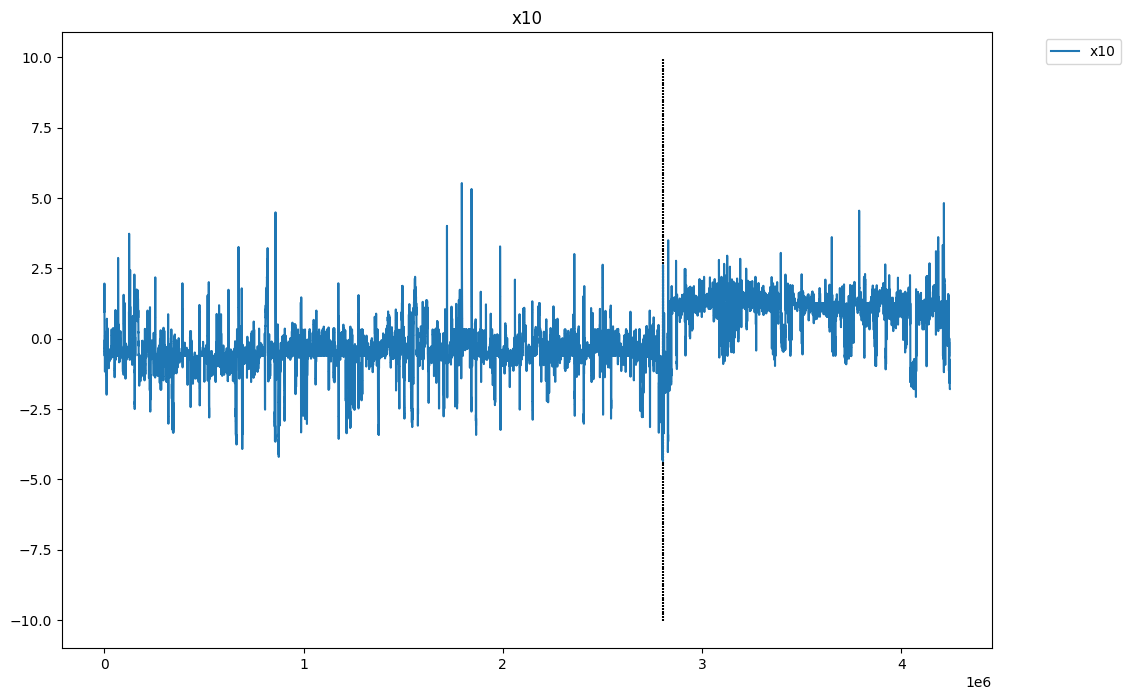

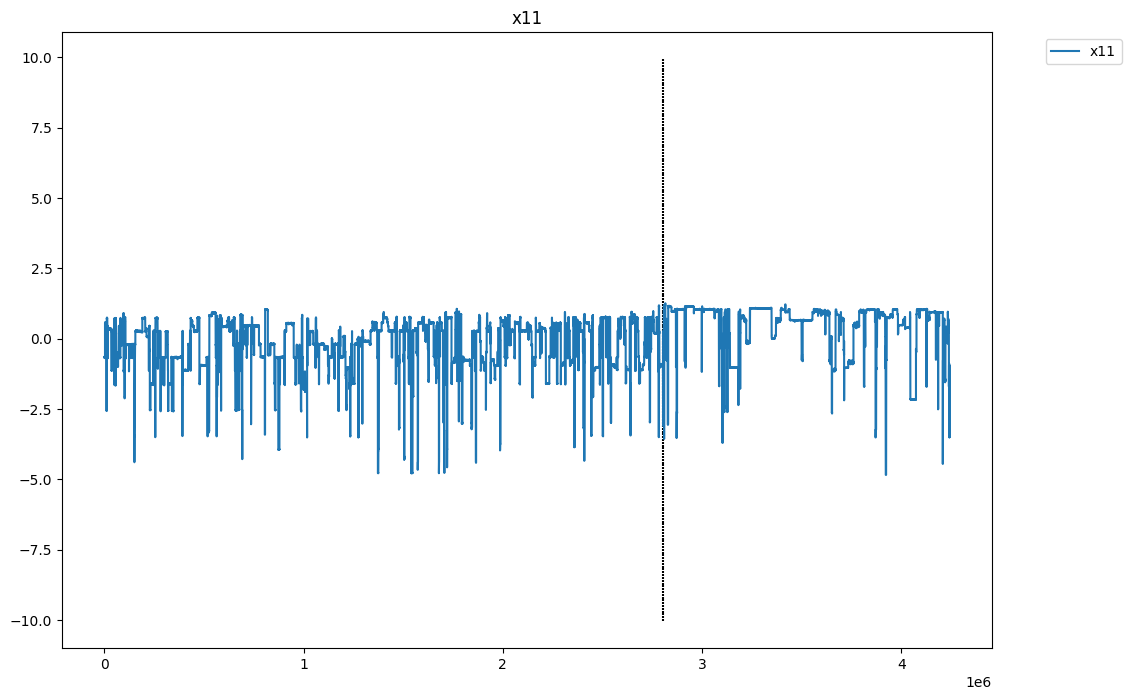

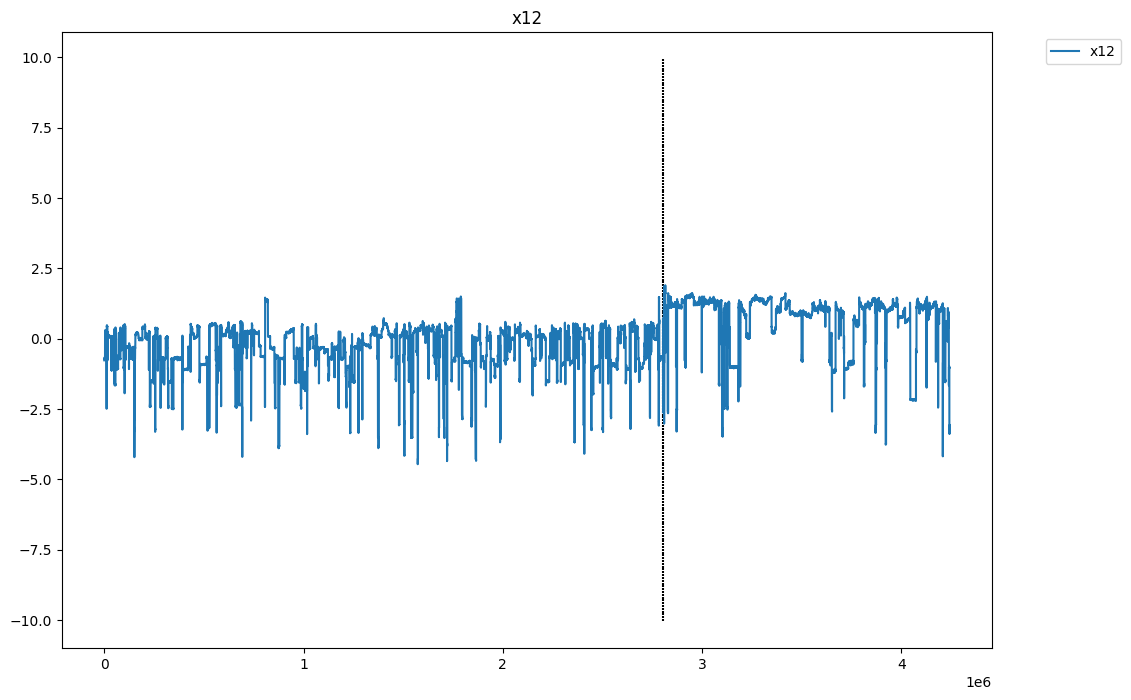

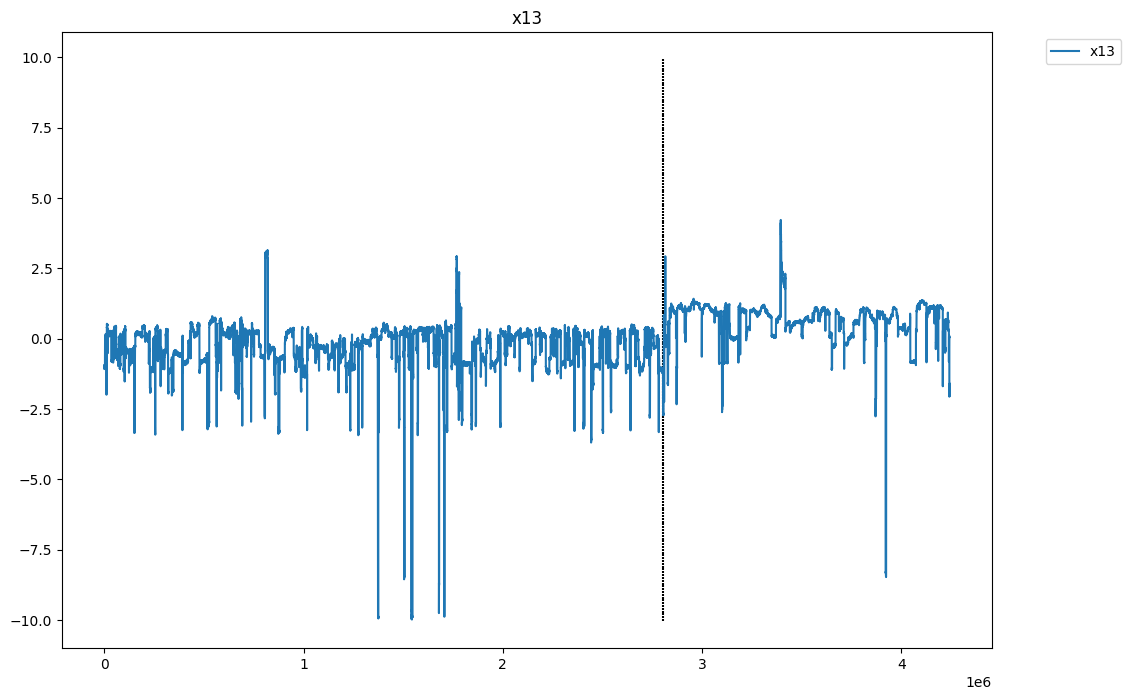

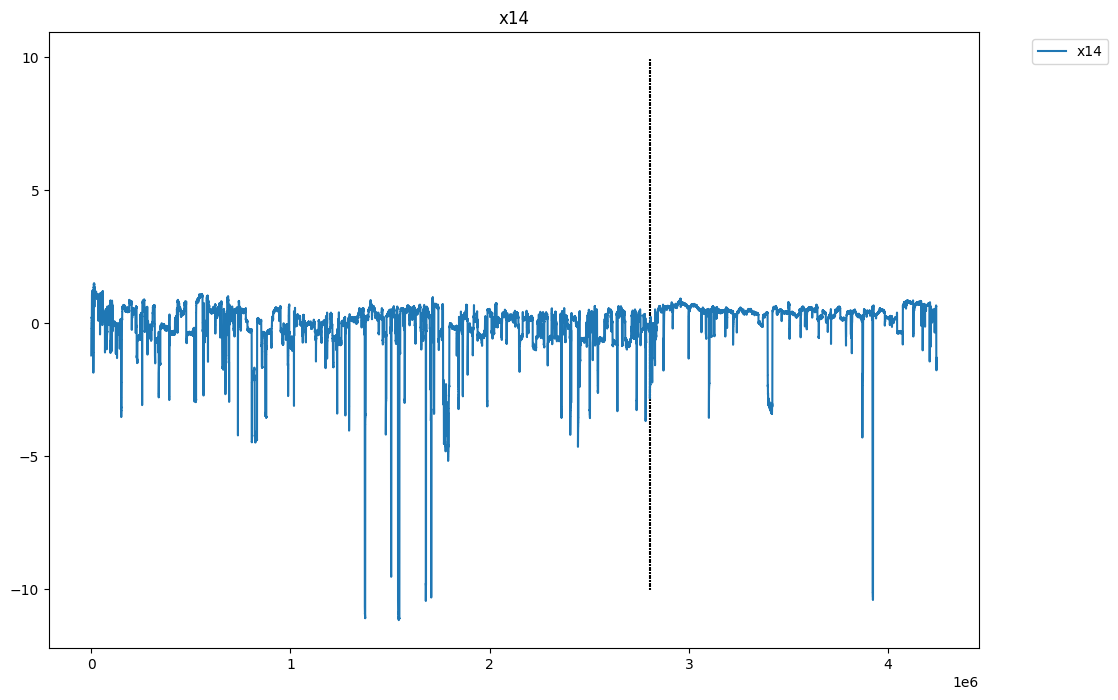

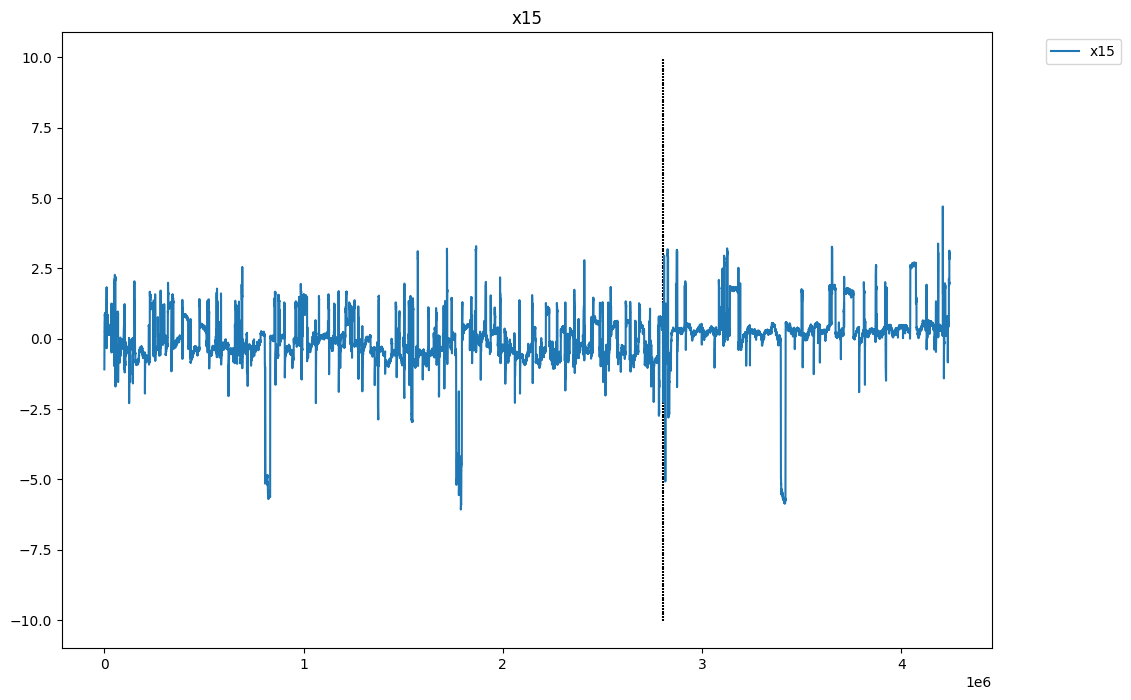

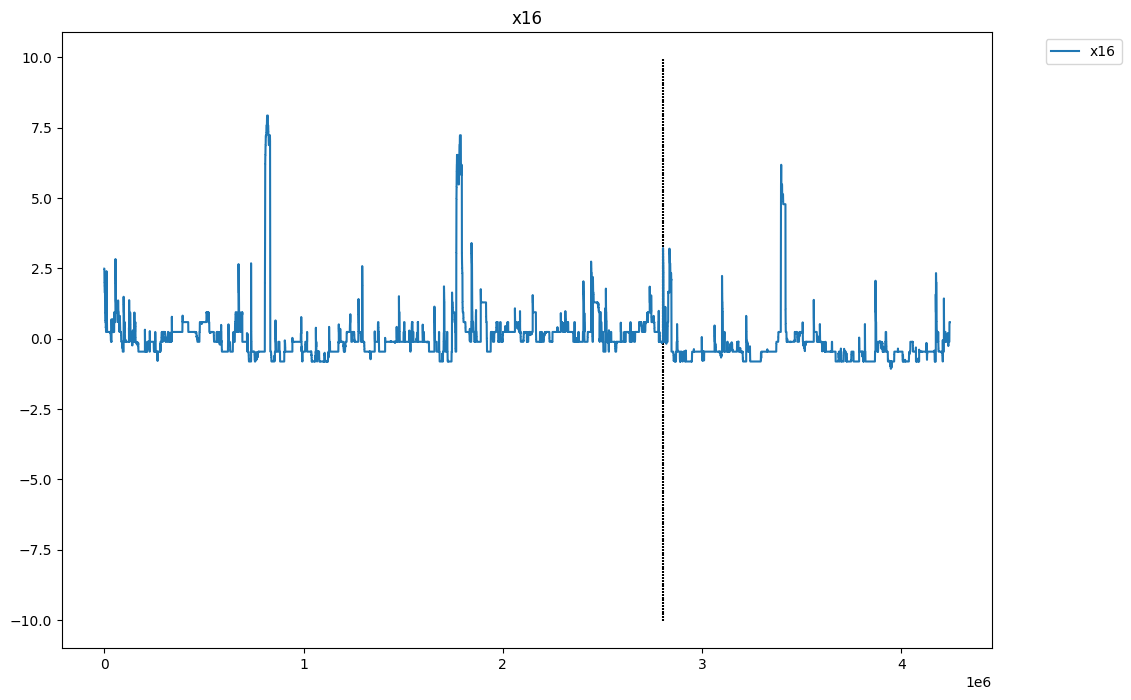

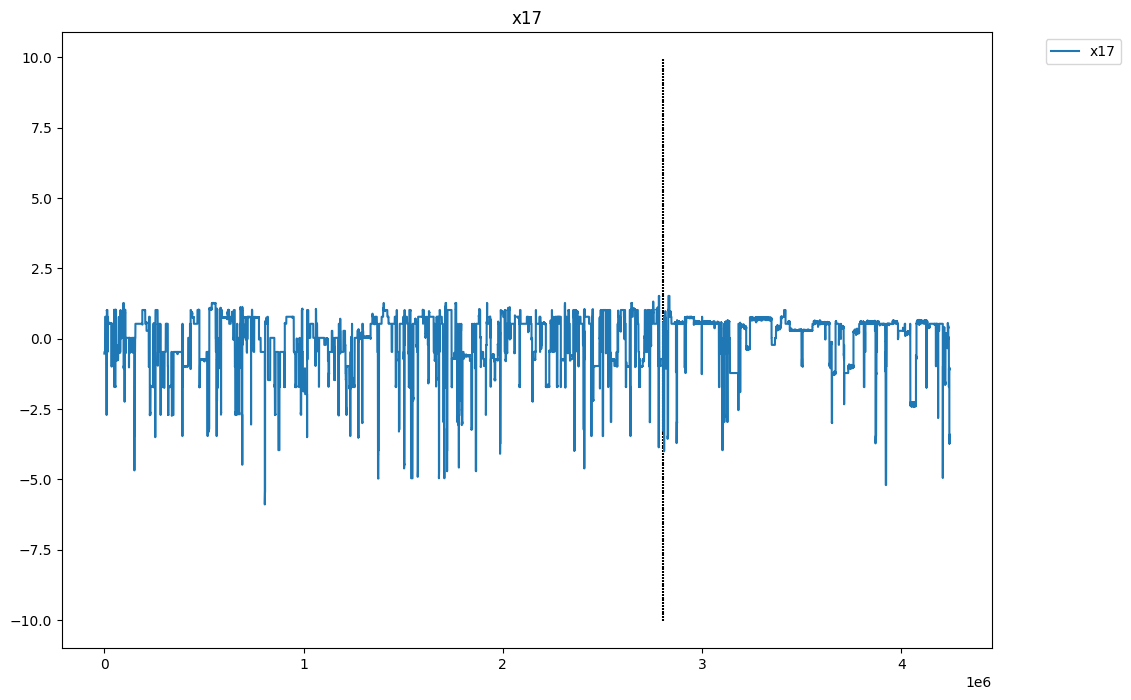

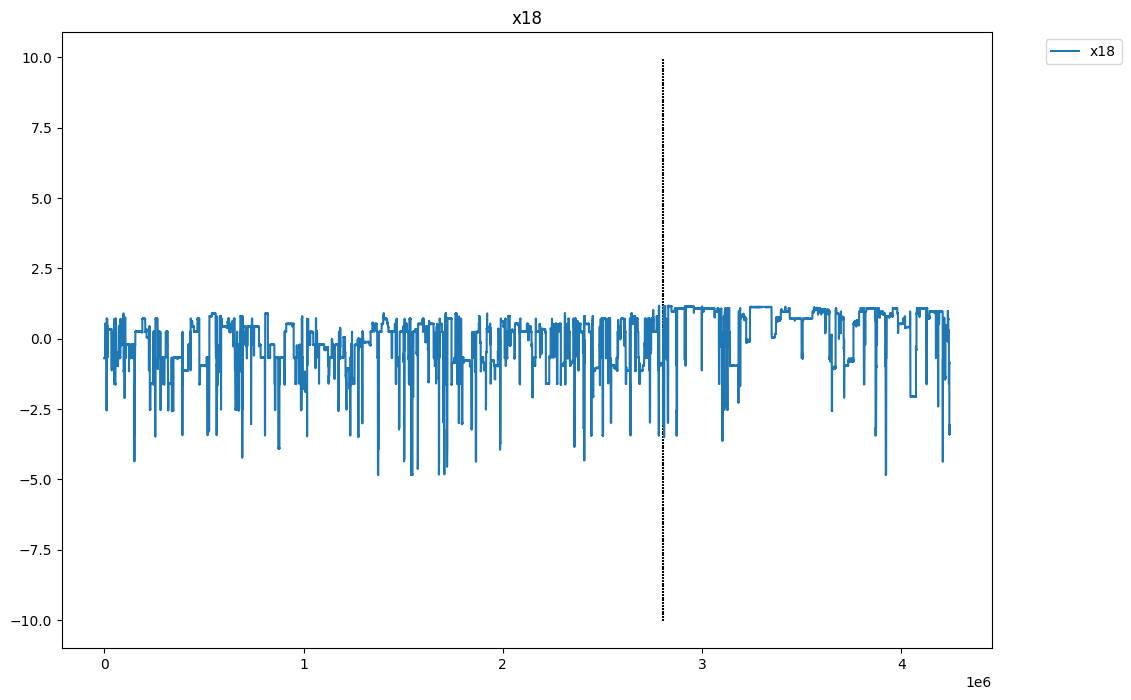

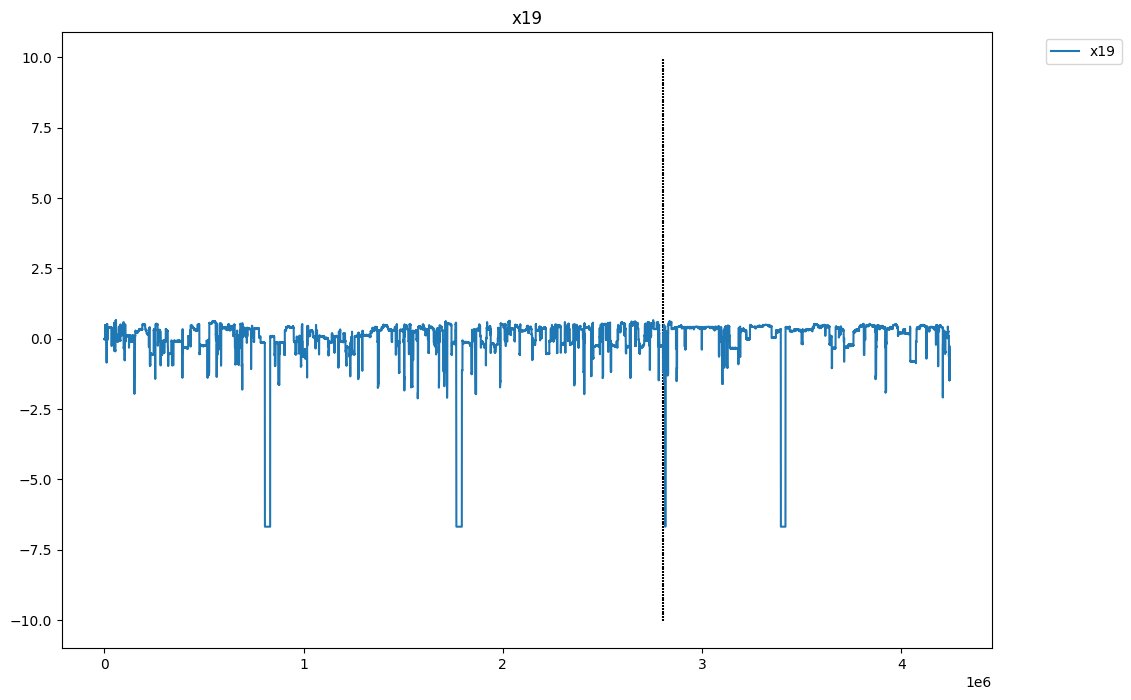

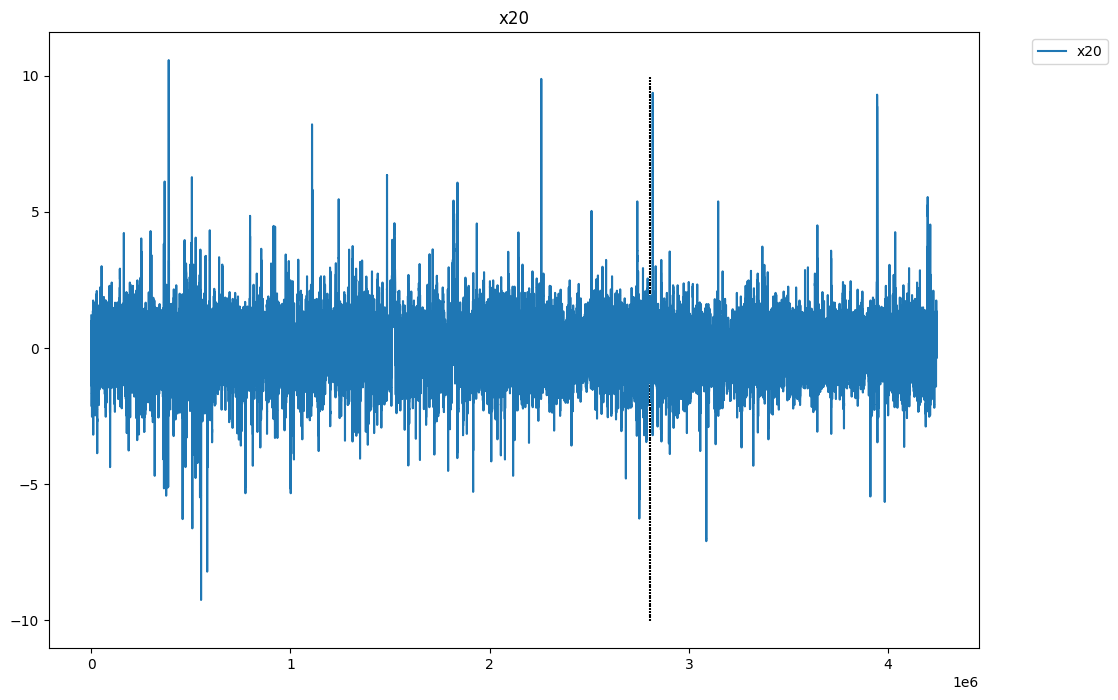

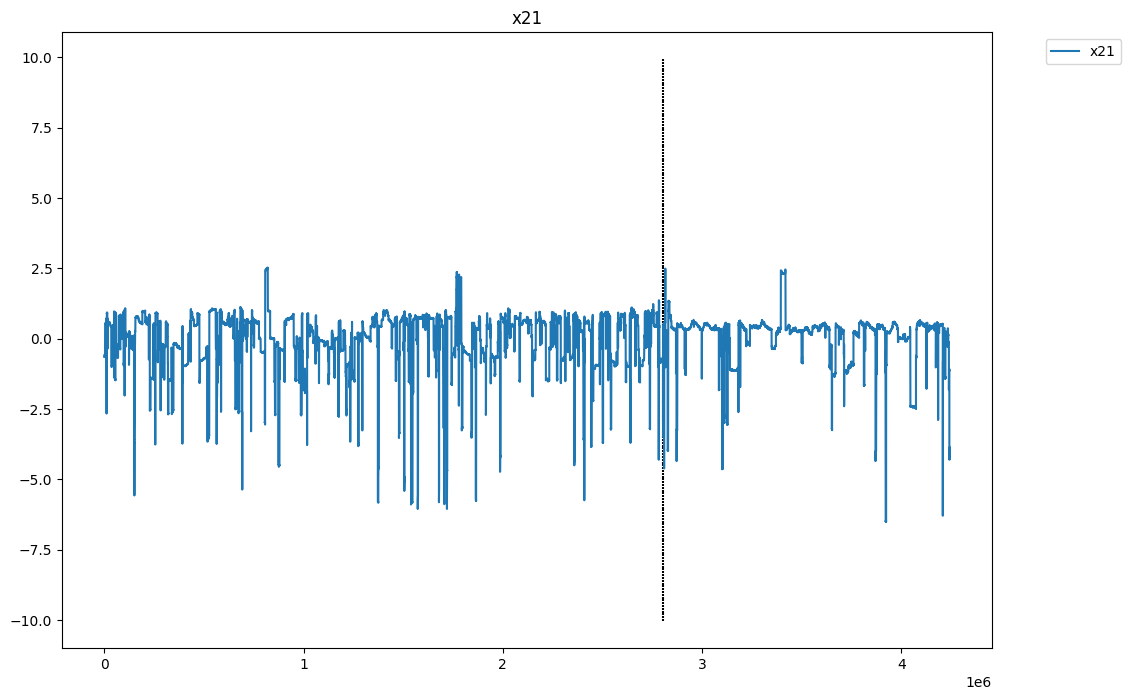

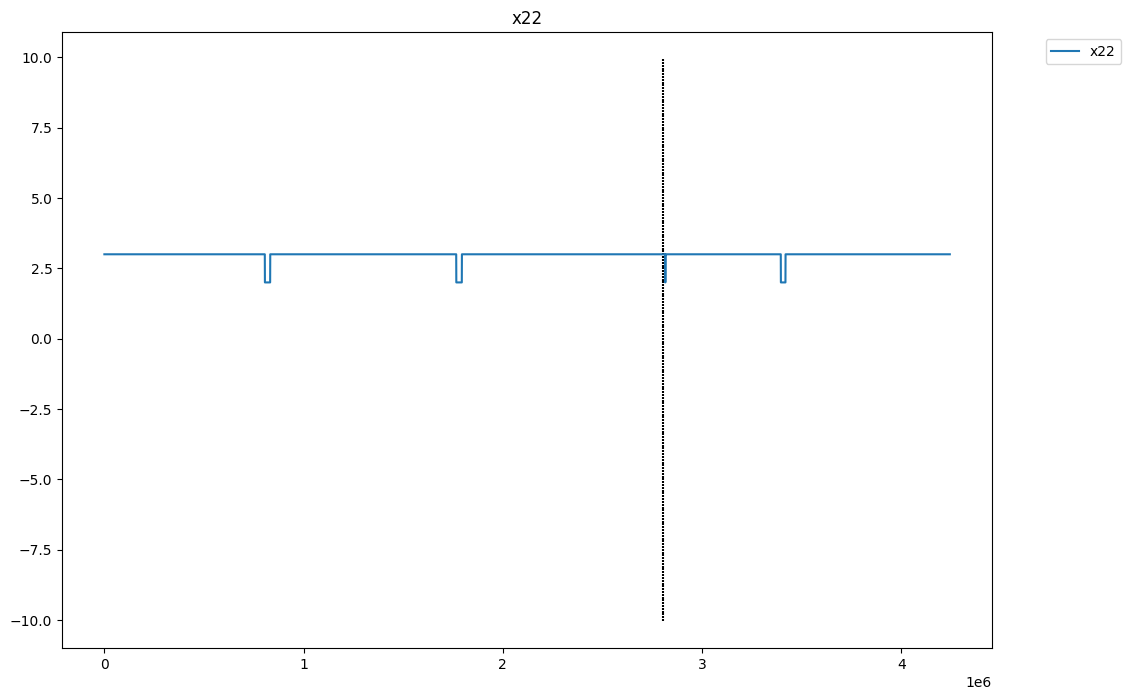

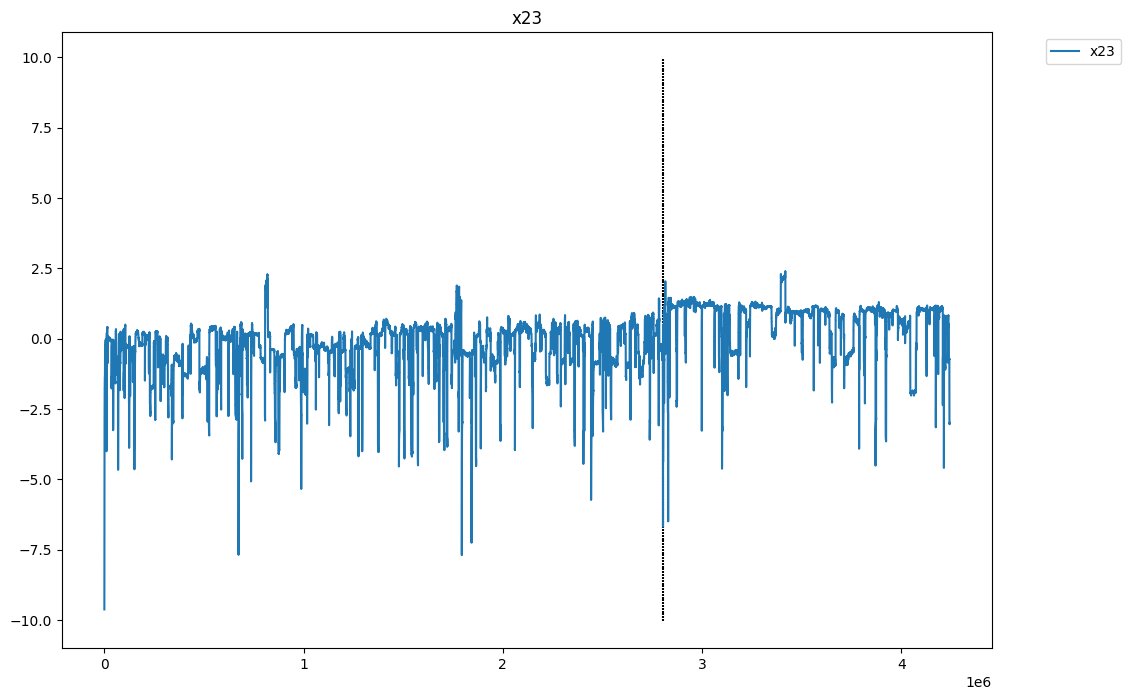

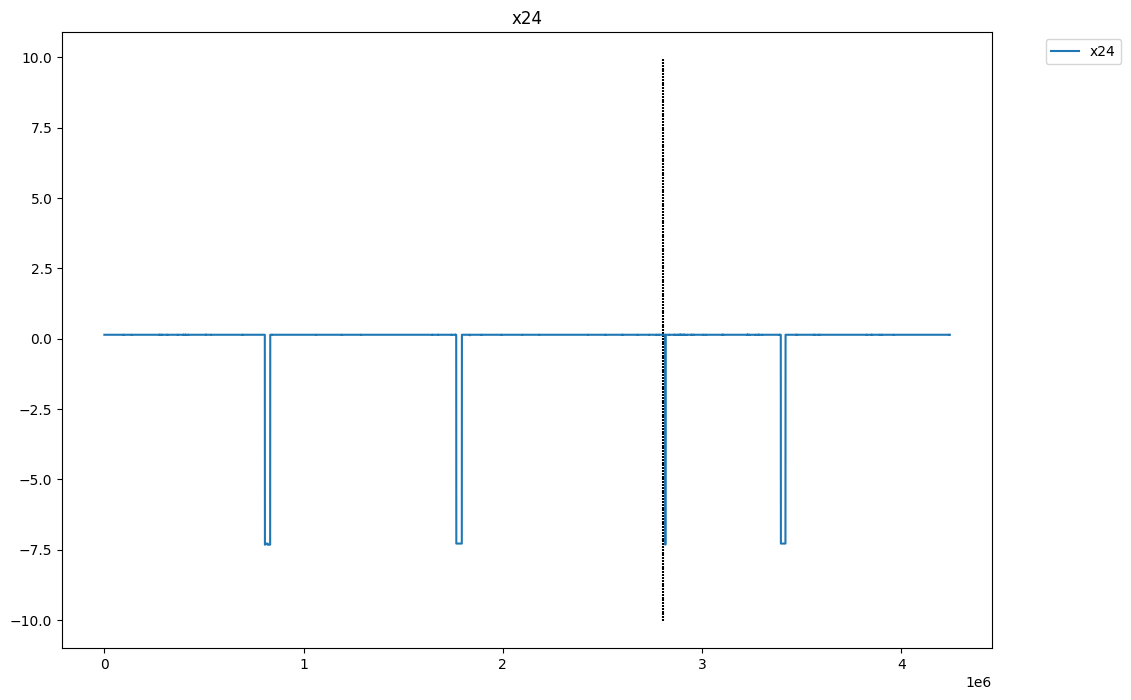

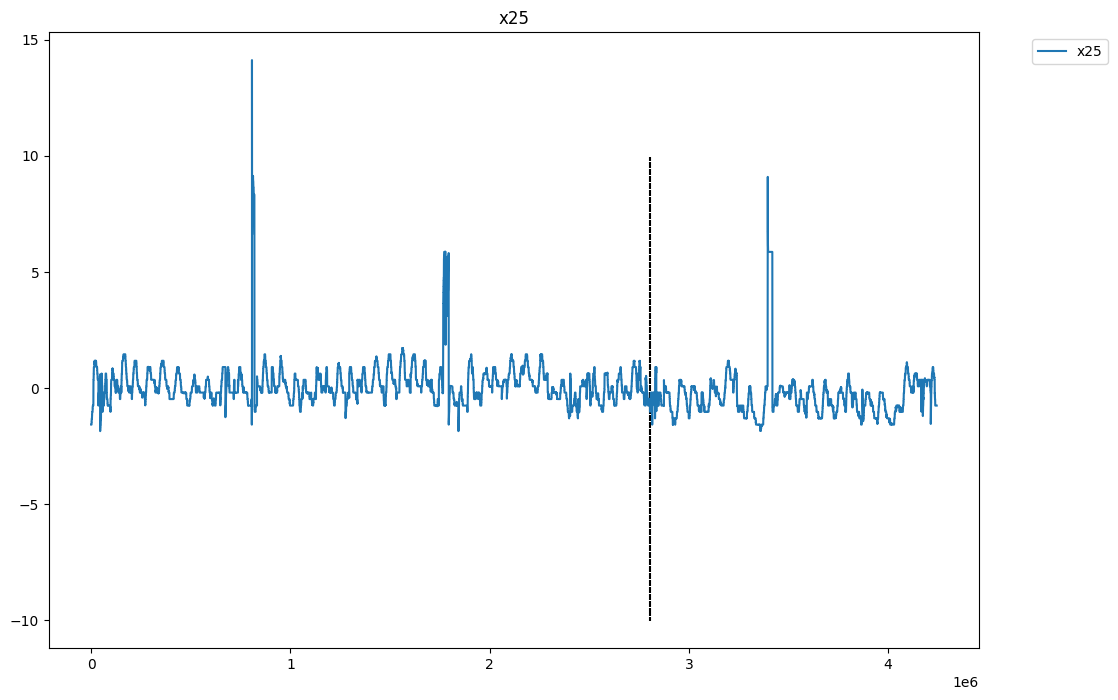

In [17]:
first_normal_index = np.argmax(motor1['x26'] == 0)

for col in motor1.columns:
    if col in ['x0', 'x26']: continue
    
    motor1[col].plot(figsize=(12, 8), title=col)
    
    # 정상으로 바뀌는 지점 표현 - black dot
    for i in np.arange(-10, 10, 0.1):
        plt.scatter(first_normal_index, i, color='black', marker='|', s=1)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()